In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("shuttle.csv", encoding="latin1")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust Ã¢?Â¹620 ..from retailer.I did...,1


In [6]:
df.shape

(8518, 8)

In [7]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [9]:
df["Ratings"].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [10]:
df["Ratings"].value_counts(normalize=True)

5    0.596384
4    0.204978
1    0.090279
3    0.072200
2    0.036159
Name: Ratings, dtype: float64

<AxesSubplot:xlabel='Ratings', ylabel='count'>

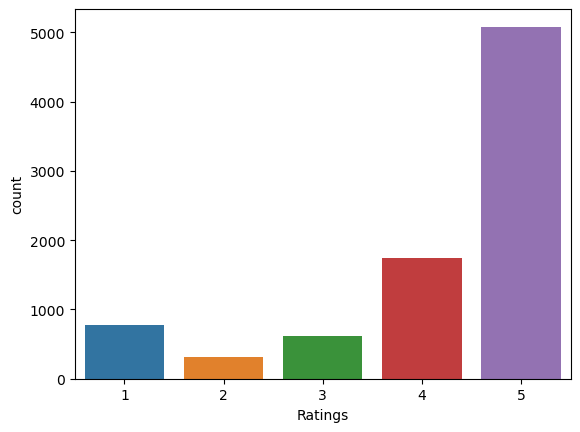

In [11]:
import seaborn as sns

sns.countplot(x='Ratings', data=df)

In [12]:
df.loc[1, 'Review text']

"They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE"

In [13]:
df.loc[0, 'Review text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud


text_data = [str(item) for item in df['Review text']]


wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(text_data))


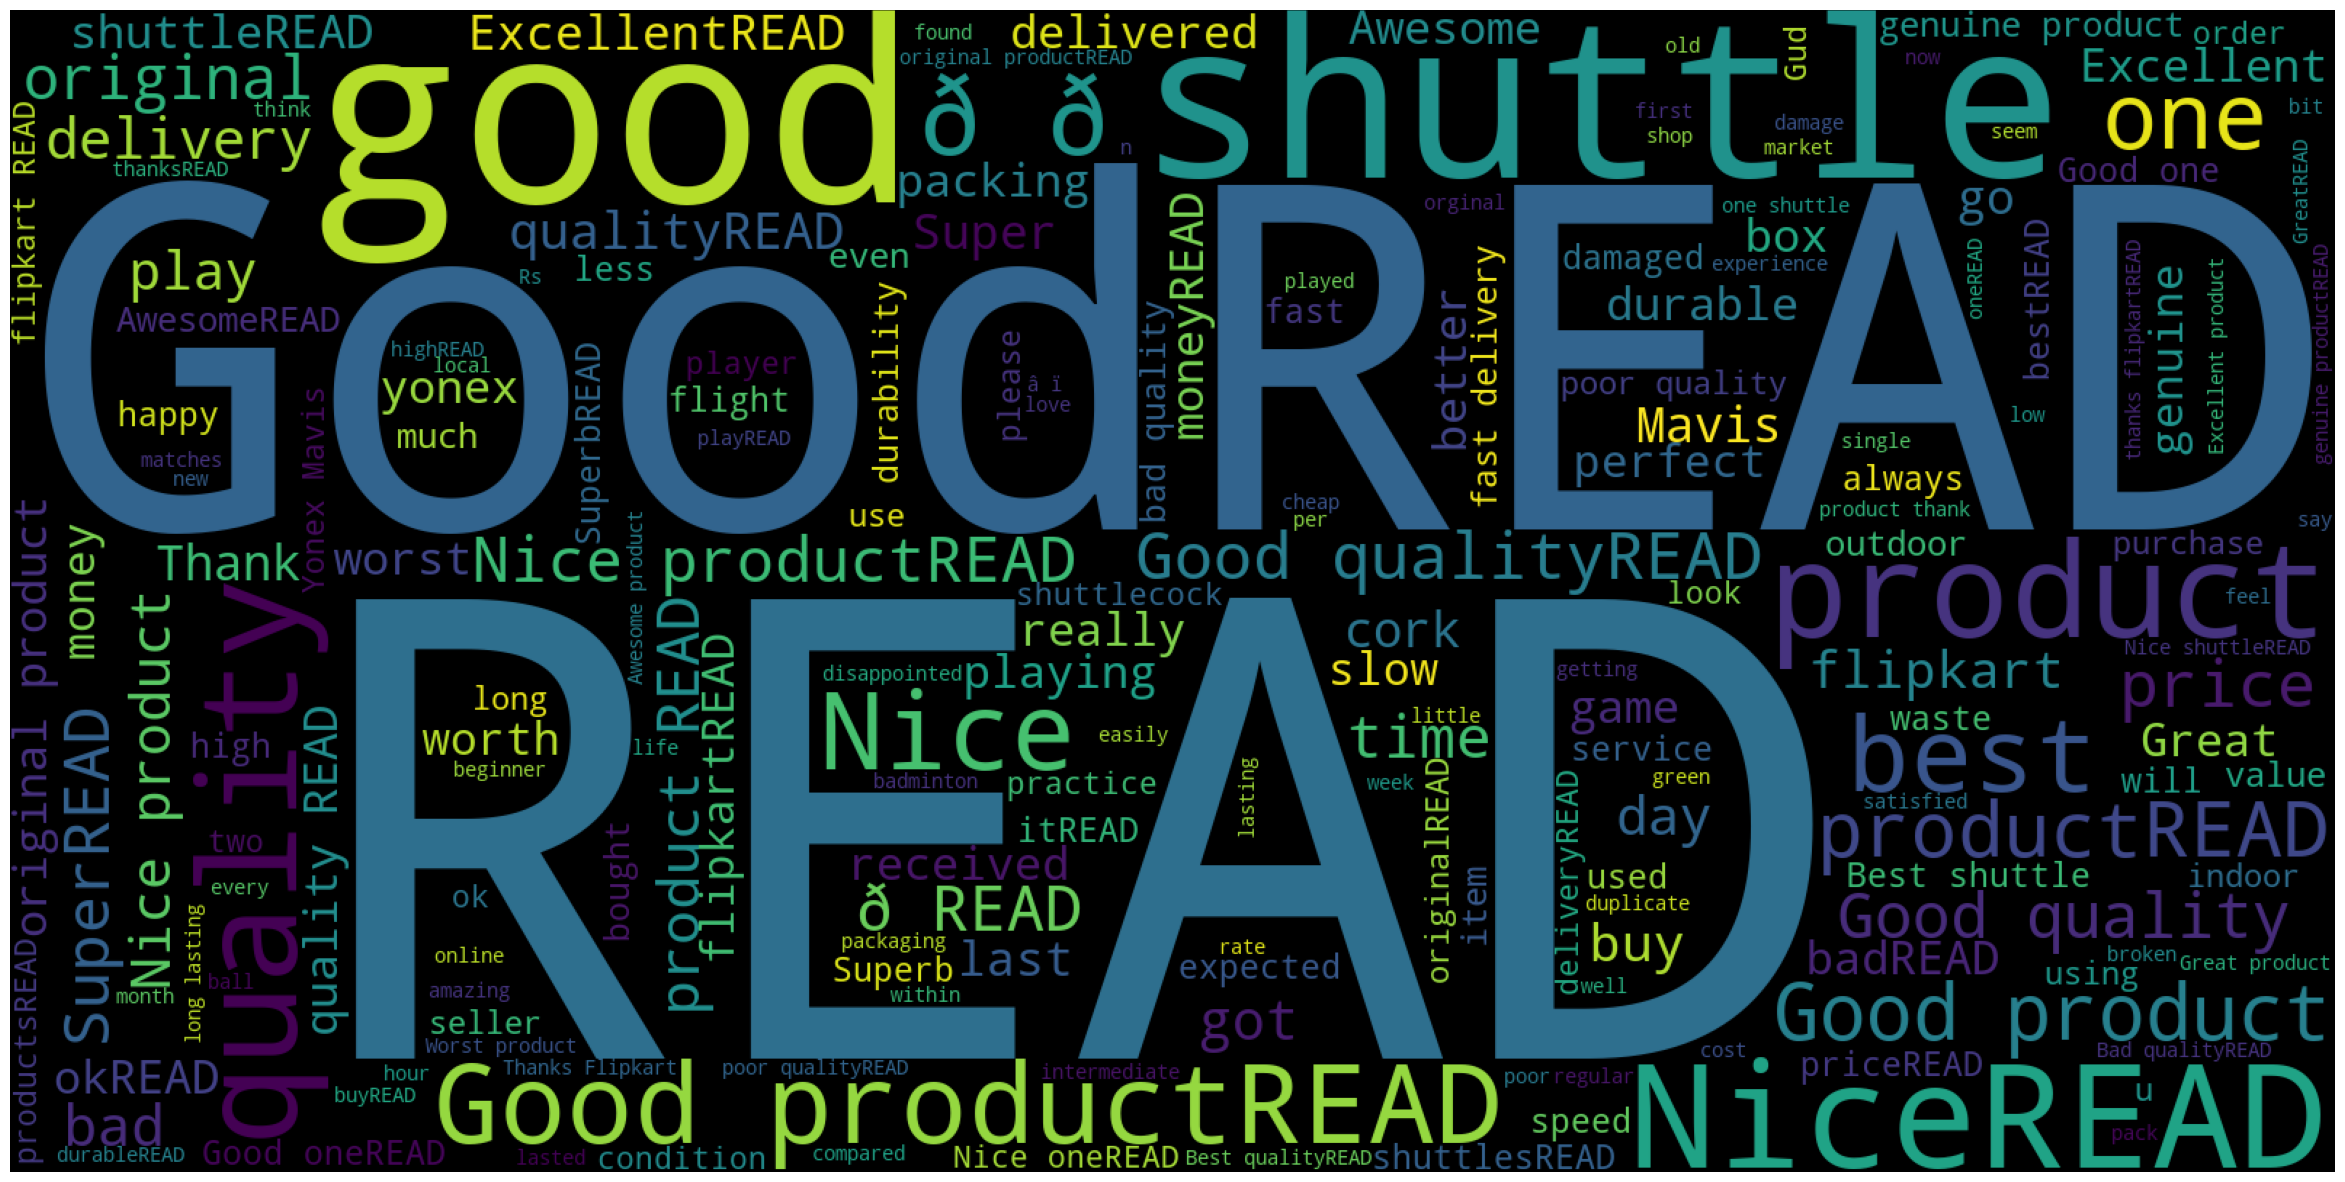

In [16]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [17]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [18]:
drop_columns = ['Reviewer Name', 'Place of Review','Up Votes', 'Down Votes','Month']
df.drop(columns=drop_columns, inplace=True)

In [19]:
df.dropna(subset=['Review text'], inplace=True)

In [20]:
df.isnull().sum()

Review Title    2
Review text     0
Ratings         0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  8508 non-null   object
 1   Review text   8510 non-null   object
 2   Ratings       8510 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 265.9+ KB


In [36]:
# convert label to a numerical variable
df['overall_rating'] = df['Ratings'].apply(lambda rating: 0 if rating <= 2 else 1) 

# Let us take only the two columns we need
df = df[['Review text','overall_rating']] 
df.shape

(8510, 2)

In [43]:
df.head()

,Review text,overall_rating
0,"Nice product, good quality, but price is now r...",1
1,They didn't supplied Yonex Mavis 350. Outside ...,0
2,Worst product. Damaged shuttlecocks packed in ...,0
3,"Quite O. K. , but nowadays the quality of the...",1
4,Over pricedJust Ã¢?Â¹620 ..from retailer.I did...,0


In [49]:
df['overall_rating'].value_counts()

1    7438
0    1072
Name: overall_rating, dtype: int64

In [50]:
df['overall_rating'].value_counts(normalize=True)

1    0.874031
0    0.125969
Name: overall_rating, dtype: float64

<AxesSubplot:xlabel='overall_rating', ylabel='count'>

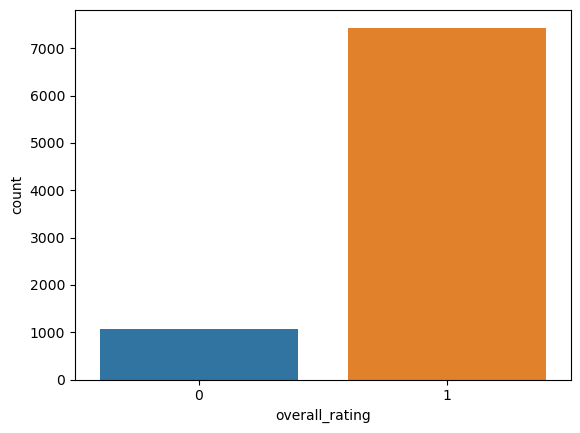

In [51]:
sns.countplot(x='overall_rating', data=df)

In [52]:
X = df['Review text']
y = df['overall_rating']
print(X.shape, y.shape)

(8510,) (8510,)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382,) (6382,)
(2128,) (2128,)


In [54]:
X_train.head()

1095                              Very nice ðREAD MORE
7326                    Very good on dry weatherREAD MORE
1377                                  Well brandREAD MORE
2127    Firstly  Yonex is best company  for badminton ...
5096                                        GoodREAD MORE
Name: Review text, dtype: object

In [55]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [56]:
    def clean(doc):
        
        doc = str(doc)

        # Remove 'READ' if found
        doc = doc.replace('READ', '')



        # Remove punctuation and numbers.
        doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

        # Converting to lower case
        doc = doc.lower()

        # Tokenization
        tokens = nltk.word_tokenize(doc)

        # Lemmatize
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Stop word removal
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

        # Join and return
        return " ".join(filtered_tokens)

In [57]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

Wall time: 3.46 s
(6382, 2540)


In [58]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2128, 2540)


In [59]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train) 

Wall time: 22.4 ms


MultinomialNB()

In [60]:
from sklearn import metrics

y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9362268881228455

In [61]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 530,  287],
       [ 120, 5445]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

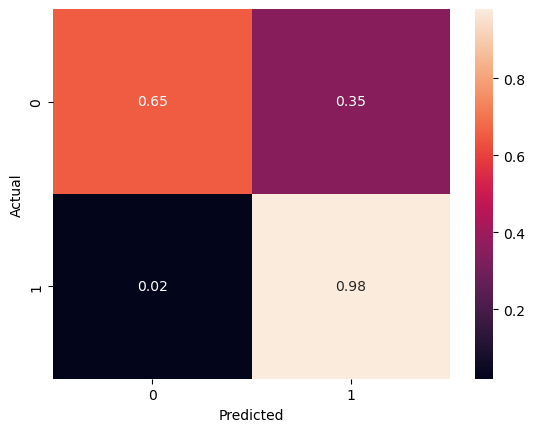

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [63]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9125939849624061

Text(0.5, 23.52222222222222, 'Predicted')

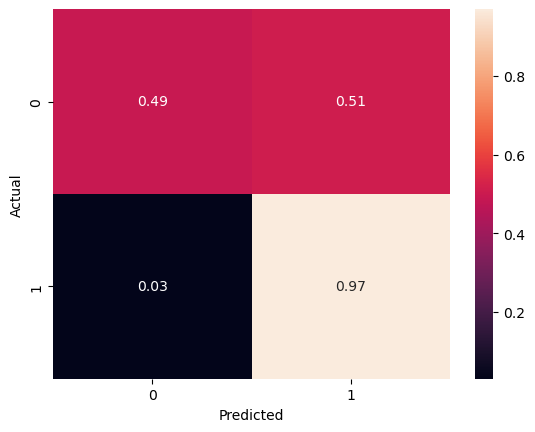

In [64]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [65]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9639727361246347
Test Score (F1 Score): 0.9512833944473547


In [66]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [67]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 2min 35s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function clean at 0x0000012FEF0E4E50>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9528823374572256


In [68]:
import joblib
from joblib import Memory

import os

In [69]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 2min 6s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function clean at 0x0000012FEF0E4E50>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9528823374572256


In [71]:
best_model = clf.best_estimator_

joblib.dump(best_model, 'demo_model_nb.pkl')

['demo_model_nb.pkl']

In [72]:
y_train.unique()

array([1, 0], dtype=int64)

In [73]:
model = joblib.load('demo_model_nb.pkl')

%time y_test_pred = model.predict(X_test)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

Wall time: 834 ms
Test Score (F1): 0.9528823374572256


In [74]:
print("Model Size:", os.path.getsize('demo_model_nb.pkl'), "Bytes")

Model Size: 106538 Bytes


In [75]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

Wall time: 2.29 s


In [76]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

Wall time: 755 ms


In [77]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 5.74 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9528823374572256


In [78]:
best_model = clf.best_estimator_

joblib.dump(best_model, 'demo_model_nb_unclean.pkl')

['demo_model_nb_unclean.pkl']

In [79]:
%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

Wall time: 754 ms
Test Score (F1): 0.9528823374572256


In [80]:
print("Model Size:", os.path.getsize('demo_model_nb_unclean.pkl'), "Bytes")

Model Size: 106518 Bytes


In [81]:
import warnings

warnings.filterwarnings('ignore')

In [82]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1 , error_score='raise'
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 4.95 s
Score on Test Data:  0.9512833944473547
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 21.7 s
Score on Test Data:  0.9522567179754762
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wall time: 7min 11s
Score on Test Data:  0.9340268272652615


In [84]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.5,
                                    penalty='elasticnet', solver='saga'))])



In [85]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

********** naive_bayes **********
Wall time: 14.9 ms
Test Score (F1) 0.9512833944473547
Model Size: 146398 Bytes
********** decision_tree **********
Wall time: 8.97 ms
Test Score (F1) 0.9522567179754762
Model Size: 79922 Bytes
********** logistic_regression **********
Wall time: 8.97 ms
Test Score (F1) 0.9340268272652615
Model Size: 85521 Bytes
